<a href="https://colab.research.google.com/github/Yan-Lopes/Analise_ENEM/blob/main/An%C3%A1lise_dos_dados_ENEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importando os arquivos
df_bruto=pd.read_csv("/content/drive/MyDrive/Teste_ENEM/dado_mg.csv",sep=";")
df_bruto.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B
1,190001237803,2019,3170206,Uberlândia,31,MG,30.0,F,1,2,...,A,A,A,B,A,A,B,A,A,A
2,190001237804,2019,3124104,Esmeraldas,31,MG,27.0,M,1,3,...,A,A,A,B,A,B,C,A,A,A
3,190001237805,2019,3118304,Conselheiro Lafaiete,31,MG,22.0,F,1,1,...,B,A,B,C,B,A,E,A,B,B
4,190001237806,2019,3162922,São Joaquim de Bicas,31,MG,23.0,F,1,4,...,B,A,A,B,B,A,C,A,B,B


In [3]:
#Criando base com dados úteis para as análises a partir da base bruta, temos:
df_exploratoria=pd.DataFrame(df_bruto,columns=["TP_SEXO","NO_MUNICIPIO_RESIDENCIA","NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_REDACAO","NU_NOTA_LC","IN_TREINEIRO","NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"])


In [4]:
#Verificando a nova base, temos:
df_exploratoria.head()

,TP_SEXO,NO_MUNICIPIO_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_LC,IN_TREINEIRO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,F,Contagem,513.6,575.5,677.0,860.0,570.7,0,160.0,120.0,180.0,200.0,200.0
1,F,Uberlândia,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,M,Esmeraldas,394.3,494.1,397.5,600.0,479.5,0,140.0,140.0,120.0,120.0,80.0
3,F,Conselheiro Lafaiete,560.0,592.0,695.1,540.0,591.1,0,120.0,120.0,120.0,120.0,60.0
4,F,São Joaquim de Bicas,504.2,554.6,462.4,580.0,519.7,0,120.0,120.0,120.0,120.0,100.0


In [5]:
#Check dos tipos de features
df_exploratoria.dtypes

TP_SEXO                     object
NO_MUNICIPIO_RESIDENCIA     object
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
NU_NOTA_LC                 float64
IN_TREINEIRO                 int64
NU_NOTA_COMP1              float64
NU_NOTA_COMP2              float64
NU_NOTA_COMP3              float64
NU_NOTA_COMP4              float64
NU_NOTA_COMP5              float64
dtype: object

In [6]:
#Calculando a média ponderada a partir dos pesos: NU_NOTA_CN=1, NU_NOTA_CH=3, NU_NOTA_MT=1, NU_NOTA_REDACAO=3, NU_NOTA_LC=2, temos:
df_exploratoria["Nota_MP"]=df_exploratoria["NU_NOTA_CN"]*1+df_exploratoria["NU_NOTA_CH"]*3+df_exploratoria["NU_NOTA_MT"]*1+df_exploratoria["NU_NOTA_REDACAO"]*3+df_exploratoria["NU_NOTA_LC"]*2

In [7]:
#Verificando a base de dados com o cálculo da média ponderada das notas, temos:
df_exploratoria.head()

,TP_SEXO,NO_MUNICIPIO_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_LC,IN_TREINEIRO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Nota_MP
0,F,Contagem,513.6,575.5,677.0,860.0,570.7,0,160.0,120.0,180.0,200.0,200.0,6638.5
1,F,Uberlândia,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,M,Esmeraldas,394.3,494.1,397.5,600.0,479.5,0,140.0,140.0,120.0,120.0,80.0,5033.1
3,F,Conselheiro Lafaiete,560.0,592.0,695.1,540.0,591.1,0,120.0,120.0,120.0,120.0,60.0,5833.3
4,F,São Joaquim de Bicas,504.2,554.6,462.4,580.0,519.7,0,120.0,120.0,120.0,120.0,100.0,5409.8


In [8]:
#Verificando a representatividade do sexo dos candidatos temos 61% do sexo feminino e 39% do sexo masculino. 
df_exploratoria.TP_SEXO.value_counts()/df_exploratoria.shape[0]

F    0.605302
M    0.394698
Name: TP_SEXO, dtype: float64

In [9]:
#Verificando a representatividade dos tipos de candidatos temos 13% de participantes treineiros. 
df_exploratoria.IN_TREINEIRO.value_counts()/df_exploratoria.shape[0]

0    0.870484
1    0.129516
Name: IN_TREINEIRO, dtype: float64

In [10]:
#Verificando a representatividade dos municípios de origem dos canditados, temos  a maior parte de Belo Horizonte (15%), seguida de Uberlândia (4%).
df_exploratoria.NO_MUNICIPIO_RESIDENCIA.value_counts()/df_exploratoria.shape[0]

Belo Horizonte        0.148259
Uberlândia            0.039781
Contagem              0.033917
Montes Claros         0.032015
Juiz de Fora          0.029565
                        ...   
Ubatuba               0.000002
Paulo Afonso          0.000002
Minaçu                0.000002
Timbaúba              0.000002
Conceição da Barra    0.000002
Name: NO_MUNICIPIO_RESIDENCIA, Length: 1483, dtype: float64

In [11]:
df_exploratoria.shape

(534627, 14)

In [12]:
#Verificando as notas ponderadas nulas, temos 144.542 casos, o que representa 27% do total de casos (após a aplicação dos filtros anteriores). A partir de então, sendo pouco representativo os casos nulos, excluiremos da base para análises posteriores.
print(df_exploratoria.Nota_MP.isna().sum())
df_exploratoria=df_exploratoria.dropna(subset=["Nota_MP"])
print(df_exploratoria.Nota_MP.isna().sum())


144542
0


In [13]:
df_exploratoria_treineiros=df_exploratoria.groupby(['IN_TREINEIRO']).agg(Contagem=('IN_TREINEIRO','count'),Media_Nota_Ponderada=('Nota_MP','mean'),Mediana_Nota_Ponderada=('Nota_MP','median'),Desvio_Padrão_Nota_Ponderada=('Nota_MP','std'))
df_exploratoria_treineiros.head()

,Contagem,Media_Nota_Ponderada,Mediana_Nota_Ponderada,Desvio_Padrão_Nota_Ponderada
IN_TREINEIRO,,,,
0,329785,5493.556435,5443.2,954.707278
1,60300,5502.574425,5541.8,925.721914


In [14]:
#A partir da tabela acima é possível evidenciar que 11,27% dos candidatos fizeram a prova como treineiro (sem considerar as notas nulas) e que as notas obtidas como treineiro são levemente maiores. Isso pode ocorrer devido ao fato dos candidatos que fazem a prova como não treineiros sentem-se pressionados para atingir boas notas para ingressar na universidade - que pode ser concluído pelo desvio padrão da nota global ponderada maior em candidatos que executam a provam como não treineiros.

In [15]:
df_exploratoria.dtypes

TP_SEXO                     object
NO_MUNICIPIO_RESIDENCIA     object
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
NU_NOTA_LC                 float64
IN_TREINEIRO                 int64
NU_NOTA_COMP1              float64
NU_NOTA_COMP2              float64
NU_NOTA_COMP3              float64
NU_NOTA_COMP4              float64
NU_NOTA_COMP5              float64
Nota_MP                    float64
dtype: object

In [16]:
#Agrupando as notas por municipio e ordenando a mediana da nota ponderada do maior para o menor, concluimos que os municipios com as 5 maiores notas tiveram um único candidato. Os municipoios de Mongaguá e Corumbá tiveram as maiores notas (acima de 7.800), sendo a retação a nota destaque (entre 960 e 980 pontos).
#Percebe-se ainda que os candidatos com maiores notas tiveram suas notas "prejudicadas" pelas provas de Ciências da Natureza e Linguagens e Códigos.
df_exploratoria_notas_municipio=df_exploratoria.groupby(['NO_MUNICIPIO_RESIDENCIA']).agg(Contagem=('NO_MUNICIPIO_RESIDENCIA','count'),Mediana_Nota_Ponderada=('Nota_MP','median'),Mediana_NU_NOTA_CN=('NU_NOTA_CN','median'),Mediana_NU_NOTA_CH=('NU_NOTA_CH','median'),Mediana_NU_NOTA_MT=('NU_NOTA_MT','median'),Mediana_NU_NOTA_REDACAO=('NU_NOTA_REDACAO','median'),Mediana_NU_NOTA_LC=('NU_NOTA_LC','median'))
df_exploratoria_notas_municipio_ordenada=df_exploratoria_notas_municipio.sort_values('Mediana_Nota_Ponderada',ascending=False)
df_exploratoria_notas_municipio_ordenada.head()

,Contagem,Mediana_Nota_Ponderada,Mediana_NU_NOTA_CN,Mediana_NU_NOTA_CH,Mediana_NU_NOTA_MT,Mediana_NU_NOTA_REDACAO,Mediana_NU_NOTA_LC
NO_MUNICIPIO_RESIDENCIA,,,,,,,
Mongaguá,1,7855.2,704.3,670.0,897.9,980.0,651.5
Corumbá,1,7811.2,631.4,726.0,846.2,960.0,637.8
Guararapes,1,7787.4,664.7,685.2,841.9,980.0,642.6
Barra da Estiva,1,7571.8,675.9,689.9,952.8,860.0,646.7
Valentim Gentil,1,7569.7,657.2,706.6,782.5,920.0,625.1


In [17]:
#Quanto aos piores candidatos, são dos municipios de Itaguatins, Altinópolis e Rincão. Os três piores tiveram suas notas prejudicadas (maiormente) pela nota da prova de redação. Diferente dos melhores candidatos, os piores apresentarão dificuldade na prova de Matemática.
df_exploratoria_notas_municipio_ordenada_piores=df_exploratoria_notas_municipio.sort_values('Mediana_Nota_Ponderada')
df_exploratoria_notas_municipio_ordenada_piores.head()

,Contagem,Mediana_Nota_Ponderada,Mediana_NU_NOTA_CN,Mediana_NU_NOTA_CH,Mediana_NU_NOTA_MT,Mediana_NU_NOTA_REDACAO,Mediana_NU_NOTA_LC
NO_MUNICIPIO_RESIDENCIA,,,,,,,
Itaguatins,1,3201.9,462.3,446.4,371.2,0.0,514.6
Altinópolis,1,3324.3,462.4,483.3,432.4,0.0,489.8
Rincão,1,3501.0,458.3,377.1,385.2,260.0,373.1
Paraúna,1,3665.6,397.1,386.3,385.2,300.0,412.2
Picos,1,3679.7,360.9,485.5,365.5,200.0,448.4


In [18]:
#Quanto as notas obtidas na prova de Ciências da Natureza, os alunos obtiveram, na média, 492 pontos - com desvio padrão de 77,88 pontos. A nota máxima foi de 842,80 pontos.
df_exploratoria['NU_NOTA_CN'].describe()

count    390085.000000
mean        492.557779
std          77.876329
min           0.000000
25%         430.600000
50%         489.500000
75%         551.200000
max         842.800000
Name: NU_NOTA_CN, dtype: float64

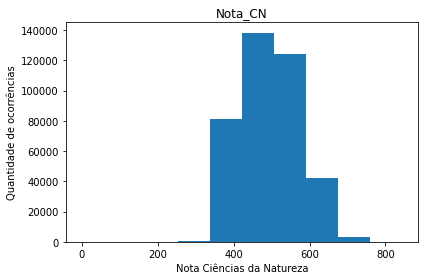

In [19]:
# Plotando o histograma da nota da prova de Ciências da Natureza verificamos a concentração das notas entre 370-650 pontos.
fig, ax = plt.subplots()

ax.hist("NU_NOTA_CN", data=df_exploratoria)
ax.set_title("Nota_CN")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("Nota Ciências da Natureza")

plt.tight_layout()

In [20]:
#Quanto as notas obtidas na prova de Ciências Humanas, os alunos obtiveram, na média, 523 pontos - com desvio padrão de 81,45 pontos. A nota máxima foi de 835,10 pontos. O comportamento da nota de Ciências Humanas foi parecido com a nota de Ciências da Natureza. Entretando, mais alunos tiveram nota acima de 650 pontos.
df_exploratoria['NU_NOTA_CH'].describe()

count    390085.000000
mean        523.841186
std          81.447197
min           0.000000
25%         466.200000
50%         529.500000
75%         582.300000
max         835.100000
Name: NU_NOTA_CH, dtype: float64

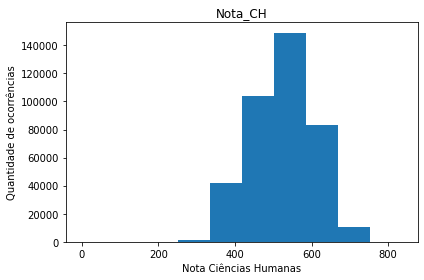

In [21]:
#Com o gráfico é possívl verificar a distribuição das notas na prova de Ciências Humanas, que indica concentração entre 300-700 pontos.
fig, ax = plt.subplots()
ax.hist("NU_NOTA_CH", data=df_exploratoria)
ax.set_title("Nota_CH")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("Nota Ciências Humanas")

plt.tight_layout()

In [22]:
#Quanto as notas obtidas na prova de Linguagens e Códigos, os alunos obtiveram, na média, 533 pontos - com desvio padrão de 59,49 pontos. A nota máxima foi de 770,50,80 pontos. Apesar da nota máxima conquistada nesta prova ser menor que nas anteriores, os candidatos obtiveram média geral maior em relação as provas de Ciências da Natureza e Ciências Humanas, com menor desvio-padrão - o que prova maior consistência dos candidatos na prova de linguagens e códigos.
df_exploratoria['NU_NOTA_LC'].describe()

count    390085.000000
mean        533.282859
std          59.490550
min           0.000000
25%         499.600000
50%         538.200000
75%         574.300000
max         770.500000
Name: NU_NOTA_LC, dtype: float64

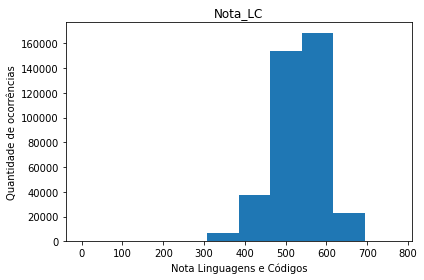

In [23]:
#Com o gráfico é possível verificar a distribuição das notas na prova de Linguagens e Códigos, que indica concentração entre 450-600 pontos:
fig, ax = plt.subplots()
ax.hist("NU_NOTA_LC", data=df_exploratoria)
ax.set_title("Nota_LC")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("Nota Linguagens e Códigos")

plt.tight_layout()

In [24]:
#Quanto as notas obtidas na prova de Matemática, os alunos obtiveram, na média, 547 pontos - com desvio padrão de 115 pontos. A nota máxima foi de 985,50 pontos. Apesar da nota máxima e média conquistada nesta prova ser maior que nas anteriores, o desvio padrão também é maior, o que indica alta dispersão das notas - o que indica menor consistência na prova de Matemática.
df_exploratoria['NU_NOTA_MT'].describe()

count    390085.000000
mean        547.060844
std         115.022546
min           0.000000
25%         451.900000
50%         531.600000
75%         630.100000
max         985.500000
Name: NU_NOTA_MT, dtype: float64

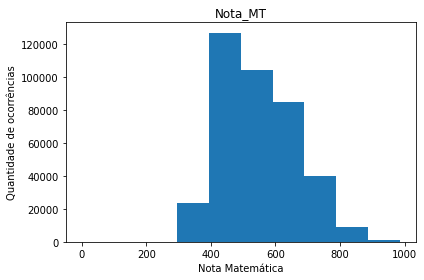

In [25]:
#Com o gráfico é possível verificar a distribuição das notas na prova de Matemática, o que indica a concentração entre 400-700 pontos.
fig, ax = plt.subplots()
ax.hist("NU_NOTA_MT", data=df_exploratoria)
ax.set_title("Nota_MT")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("Nota Matemática")

plt.tight_layout()

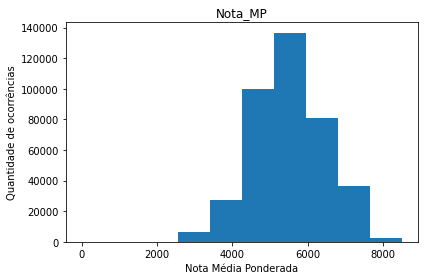

In [26]:
# Plotando o histograma da nota ponderada geral, verificamos que a maior concentração da nota está entre 3000-7500
fig, ax = plt.subplots()

ax.hist("Nota_MP", data=df_exploratoria)
ax.set_title("Nota_MP")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("Nota Média Ponderada")

plt.tight_layout()

In [27]:
#Verificando que as notas ponderadas inferior a 3000 são consideradas outlier, excluiremos da base.
df_exploratoria=df_exploratoria.loc[df_exploratoria["Nota_MP"]>=3000]

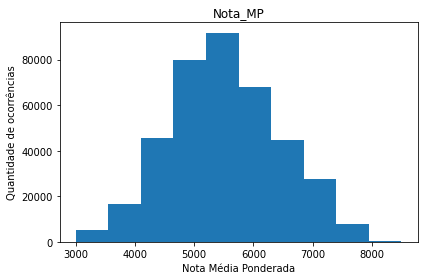

In [28]:
#Após a limpeza, verificamos que a distribuição das notas ponderadas ficou mais próxima de uma distribuição normal.
fig, ax = plt.subplots()

ax.hist("Nota_MP", data=df_exploratoria)
ax.set_title("Nota_MP")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("Nota Média Ponderada")

plt.tight_layout()

In [29]:
#Como o objetivo é executar uma regressão, faremos uma nova limpeza de outlier, dessa vez com os casos >=7800
df_exploratoria=df_exploratoria.loc[df_exploratoria["Nota_MP"]<7800]


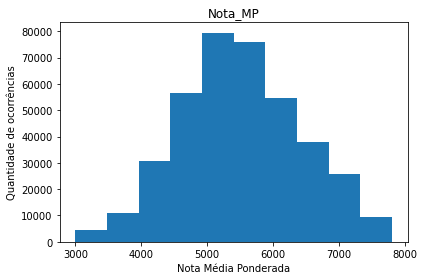

In [30]:
#Após a limpeza, verificamos que a distribuição das notas ponderadas ficou mais próxima de uma distribuição normal.
fig, ax = plt.subplots()

ax.hist("Nota_MP", data=df_exploratoria)
ax.set_title("Nota_MP")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("Nota Média Ponderada")

plt.tight_layout()

In [31]:
#Com a limpeza, houve perda de 1% dos dados (após filtros já executados)
df_exploratoria.shape

(386004, 14)

In [32]:
#A partir das análises até agora realizadas, montaremos a base de dados com as features necessárias para a elaboração do modelo de regressão:
df_modelagem=pd.DataFrame(df_exploratoria,columns=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_REDACAO","NU_NOTA_LC","Nota_MP"])


In [33]:
#A partir de então, verificaremos as correlações entre as variáveis:
df_corr_modelagem=df_modelagem.corr()
df_corr_modelagem

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_LC,Nota_MP
NU_NOTA_CN,1.000000,0.690655,0.663093,0.541775,0.653623,0.747257
NU_NOTA_CH,0.690655,1.000000,0.631844,0.552664,0.745535,0.816184
NU_NOTA_MT,0.663093,0.631844,1.000000,0.544086,0.601697,0.740236
NU_NOTA_REDACAO,0.541775,0.552664,0.544086,1.000000,0.540531,0.912211
NU_NOTA_LC,0.653623,0.745535,0.601697,0.540531,1.000000,0.767854
Nota_MP,0.747257,0.816184,0.740236,0.912211,0.767854,1.000000


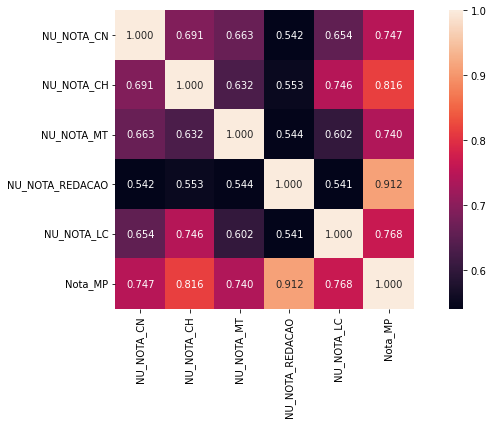

In [34]:
# A partir da análise das correlações entre as variáveis, verificamos que a nota final ponderada tem maior correlação com a nota da redação (0,91) e nota de ciências humanas (0,81), embora todas as correlações superaram 0,74 - o que indica forte correlação entre as variáveis. A nota menos correlacionada com a nota geral é a prova de matemática (0,74). A menor correlação deve-se ao fato da maior dispersão entre as notas de matemática em relação as notas ponderadas.
# A partir da análise de correlação de pearson indicar maior correlação entre as notas ponderadas e redação, faremos uma análise exploratória das notas de redação antes de encaminharmos para a elaboração do modelo de regressão.
import seaborn as sns
fig, ax=plt.subplots(figsize=(10,6))

sns.heatmap(df_corr_modelagem,fmt='.3f',square=True,linecolor='white',vmax=1.0,annot=True);
plt.tight_layout()

In [35]:
#Construiremos uma base de dados específica com os  componentes necessários para cálculo da nota global de redação.
df_redacao=pd.DataFrame(df_exploratoria,columns=["NU_NOTA_REDACAO","NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"])

In [36]:
df_corr_redacao=df_redacao.corr()
df_corr_redacao

,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
NU_NOTA_REDACAO,1.000000,0.823302,0.883563,0.928772,0.881269,0.871011
NU_NOTA_COMP1,0.823302,1.000000,0.654795,0.748443,0.785788,0.586844
NU_NOTA_COMP2,0.883563,0.654795,1.000000,0.847116,0.712989,0.675252
NU_NOTA_COMP3,0.928772,0.748443,0.847116,1.000000,0.791677,0.726169
NU_NOTA_COMP4,0.881269,0.785788,0.712989,0.791677,1.000000,0.667204
NU_NOTA_COMP5,0.871011,0.586844,0.675252,0.726169,0.667204,1.000000


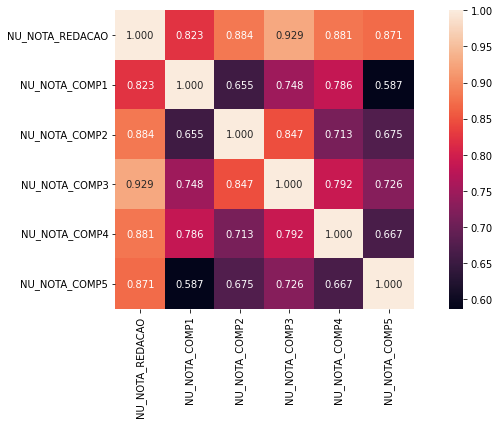

In [37]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(10,6))

sns.heatmap(df_corr_redacao,fmt='.3f',square=True,linecolor='white',vmax=1.0,annot=True);
plt.tight_layout()

# A partir do gráfico de correlação, verificamos que a nota da redação tem correlação forte com todas as competências, mas as maiores correlações é com a competência 3 (0,93) - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista - e competência 2 (0,88) - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.
# A competência 1 possui menor correlação entre as competências (mas mesmo assim é alta), o que sugere que mostrar domínio da língua portuguesa está menos correlacionada com a nota final da redação. Em outras palavras, para ter a nota superior, os candidatos precisam ter maior destaque nas competências 3 e 2.

In [38]:
# importar bibliotecas para regressão
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [39]:
df_modelagem.dtypes

NU_NOTA_CN         float64
NU_NOTA_CH         float64
NU_NOTA_MT         float64
NU_NOTA_REDACAO    float64
NU_NOTA_LC         float64
Nota_MP            float64
dtype: object

In [40]:
#Elaboração do modelo de regressão linear da Nota Média Ponderada
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. Instanciar e escolher os hyperparameters
model = LinearRegression()

# 3. Separar os dados entre feature matrix e target vector
X = df_modelagem.drop('Nota_MP',axis=1)
y = df_modelagem['Nota_MP']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

In [41]:
# Imprimindo os coeficientes, é possível perceber que o coeficiente de cada variável é exatamente o peso atribuído a cada uma das variáveis.
print("Coeficiente:\t", model.coef_)
print("Intercepto:\t", model.intercept_)

Coeficiente:	 [1. 3. 1. 3. 2.]
Intercepto:	 9.094947017729282e-13


In [42]:
# Verificando o desempenho do modelo, é possível concluir que 100% das variações da nota ponderada pode ser explicada pelas variáveis independentes selecionadas (provas) - os coeficientes de erro são praticamente zero.
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 1.0
MAE:		 7.830291246727942e-13
MSE:		 1.0193095339623052e-24


In [43]:
df_redacao.dtypes

NU_NOTA_REDACAO    float64
NU_NOTA_COMP1      float64
NU_NOTA_COMP2      float64
NU_NOTA_COMP3      float64
NU_NOTA_COMP4      float64
NU_NOTA_COMP5      float64
dtype: object

In [44]:
#A fim de construir um modelo em que não houve feature engeneering, estimaremos um modelo de regressão linear considerando as notas de cada competência da redação.
#Entretanto, a partir das análises de correlação, elaboraremos a regressão considerando apenas as notas das competências 3 e 2.
#Sendo:
df_redacao_filtrada=pd.DataFrame(df_redacao,columns=["NU_NOTA_REDACAO","NU_NOTA_COMP2","NU_NOTA_COMP3"])


In [45]:
#Elaboração do modelo de regressão linear da Nota de Redação
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. Instanciar e escolher os hyperparameters
model2 = LinearRegression()

# 3. Separar os dados entre feature matrix e target vector
X2 = df_redacao_filtrada.drop('NU_NOTA_REDACAO',axis=1)
y2 = df_redacao_filtrada['NU_NOTA_REDACAO']

# 3.1 Dividir o dataset entre treino e teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)

# 4. Fit do modelo (treinar)
model2.fit(X2_train, y2_train)

# 5. Fazer previsões em cima dos dados de teste
y2_pred = model2.predict(X2_test)


In [46]:
# Verificando o desempenho do modelo, é possível concluir que 90% das variações da nota de redação pode ser explicada pela competência 2 e 3 com erro absoluto de 45,81. Em termos práticos, é possível prever o resultado da redação a partir das competências mencionadas, com um erro absoluto de 46 pontos.
print("R2 Score:\t", r2_score(y2_test, y2_pred))
print("MAE:\t\t", mean_absolute_error(y2_test, y2_pred))
print("MSE:\t\t", mean_squared_error(y2_test, y2_pred))

R2 Score:	 0.8960379578756911
MAE:		 45.83029750533448
MSE:		 3333.9382496236954


In [47]:
#Utilizando a mesma lógica da análise de correlação para preparar o modelo de regressão, estimaremos a regressão linar para a nota média ponderada considerando apenas as notas de Redação e de Ciências Humanas. 
df_modelagem_filtrada_NMP=pd.DataFrame(df_modelagem,columns=["NU_NOTA_CH","NU_NOTA_REDACAO","Nota_MP"])

In [48]:
#Elaboração do modelo de regressão linear da Nota Ponderada a partir das notas de Redação e Ciências Humanas
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. Instanciar e escolher os hyperparameters
model3 = LinearRegression()

# 3. Separar os dados entre feature matrix e target vector
X3 = df_modelagem_filtrada_NMP.drop('Nota_MP',axis=1)
y3 = df_modelagem_filtrada_NMP['Nota_MP']

# 3.1 Dividir o dataset entre treino e teste
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3)

# 4. Fit do modelo (treinar)
model3.fit(X3_train, y3_train)

# 5. Fazer previsões em cima dos dados de teste
y3_pred = model3.predict(X3_test)

In [49]:
# Verificando o desempenho do modelo, é possível concluir que 97% das variações da nota global ponderada pode ser explicada pela nota de Redação e nota de Ciências com erro absoluto de 121,31 pontos. Em termos práticos, é possível prever o resultado ponderado global a partir das notas mencionadas, ficando o modelo da seguinte forma:
print("MAE:\t\t", mean_absolute_error(y3_test, y3_pred))
print("MSE:\t\t", mean_squared_error(y3_test, y3_pred))

MAE:		 120.82816642612451
MSE:		 23149.31276636946


In [50]:
# Imprimindo os coeficientes, é possível perceber que o coeficiente de cada variável:
print("Coeficiente:\t", model3.coef_)
print("Intercepto:\t", model3.intercept_)

Coeficiente:	 [5.15938174 3.39663505]
Intercepto:	 733.2386342308855


In [51]:
# Imprimindo os coeficientes do modelo da redação com duas variáveis, temos:
print("Coeficiente:\t", model2.coef_)
print("Intercepto:\t", model2.intercept_)

Coeficiente:	 [1.49499505 2.9757294 ]
Intercepto:	 52.390271137500804


In [52]:
#A partir de então, é possível obter a equação reduzida da nota ponderada e da redação, respectivamente:
#NP= 734,62 + 5,1564239*Nota_Redação + 3,39767438*Nota_Ciências_Humanas + e
#Nota_Redação=52,45 + 1,49100759*COMP_2 + 2,97938168*COMP_3 + e

In [53]:
#A partir de então, será realizada a cross vaidation para cada um dos modelos de equação reduzida para verificar a acuracidade.
#Importando o pacote
from sklearn.model_selection import cross_val_score
#Instanciando a cross-validation para o modelo de equação reduzida da redação
scores2 = cross_val_score(model2, X2_train, y2_train, cv=5)

print("scores: ", scores2)
print("Acurácia: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

#O resultado indica a acurácia em 0,90 com desvio padrão zerado, o que indica que a validação cruzada com base nos dados de treino, considerando 5 folds, foi satisfatória.

scores:  [0.8959071  0.89578742 0.89541874 0.89529942 0.89610358]
Acurácia: 0.90 (+/- 0.00)


In [54]:
#Fazendo a croos-validation para o modelo de equação reduzida da nota ponderada, temos:
scores3 = cross_val_score(model3, X3_train, y3_train, cv=5)

print("scores: ", scores3)
print("Acurácia: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std() * 2))

#O resultado indica a acurácia em 0,97 com desvio padrão zerado, o que indica que a validação cruzada com base nos dados de treino, considerando 5 folds, foi satisfatória - superior aos resultados obtidos com o modelo das notas da redação.

scores:  [0.97234993 0.97246023 0.97241125 0.97199669 0.97222433]
Acurácia: 0.97 (+/- 0.00)
